## 回帰分析による最適な次元数の考察

Author: 2023TS054 大橋七熙
Date: 2025年11月24日

### Step 1
Import necessary Libraries

In [66]:
from pathlib import Path # ファイルパスの取り扱い
import pandas as pd # データの取り扱い（CSVからの読み込みに利用）
from pandas import Series, DataFrame
import numpy as np # 数値計算
import matplotlib.pyplot as plt # グラフ描画
from sklearn.preprocessing import StandardScaler # データの正規化
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.preprocessing import PolynomialFeatures # 多項式の特徴量の取り扱い
from sklearn.metrics import root_mean_squared_error # 平方根平均二乗誤差
from sklearn.pipeline import Pipeline # パイプラインオブジェクト

### Step2
Improt Datasets from Local Files and TestDatasets

In [67]:
train = pd.read_csv(Path("02_data", "train3.csv"))
# train
test = pd.read_csv(Path("02_data", "test3.csv"))
# test

### Step 3
Extract x and t from train and test datasets

In [68]:
train_X = train[["x"]]
train_t = train[["t"]]
test_X = test[["x"]]
test_t = test[["t"]]

### Step 4
Check the plot of train and test datasets

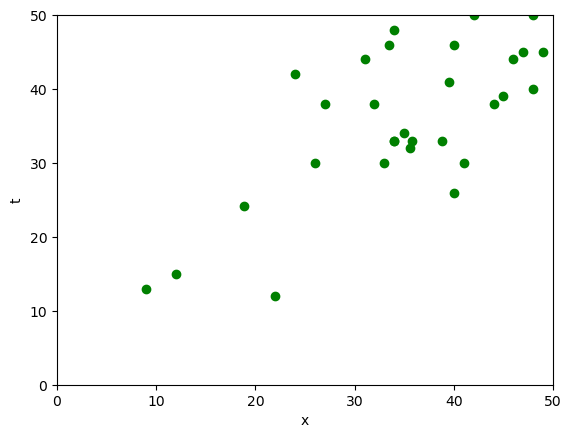

In [69]:
def plot_test_data(test_X, test_t, xlim=(0, 50), ylim=(0, 50), color="green", option=[]):
    fig = plt.figure()
    subplot = fig.add_subplot()
    subplot.set_xlabel("x")
    subplot.set_ylabel("t")
    subplot.set_xlim(*xlim)
    subplot.set_ylim(*ylim)
    subplot.scatter(test_X, test_t, marker="o", color=color)
    for plot_func in option:
        plot_func(subplot)
    plt.show()

plot_test_data(test_X, test_t, xlim=(0, 50), ylim=(0, 50), color="green")

### Step 5
fit polynomial regression model

In [70]:
m = 3 # フィットさせる多項式の次数
poly = PolynomialFeatures(degree = m) # 多項式回帰用の特徴量変換器
poly_X_train = poly.fit_transform(train_X) # 多項式用の特徴量に変換（行列 Φ を用意）
model = LinearRegression() # 線形回帰モデル
_ = model.fit(poly_X_train, train_t) # 多項式にフィット

### Step 6
Plot the results

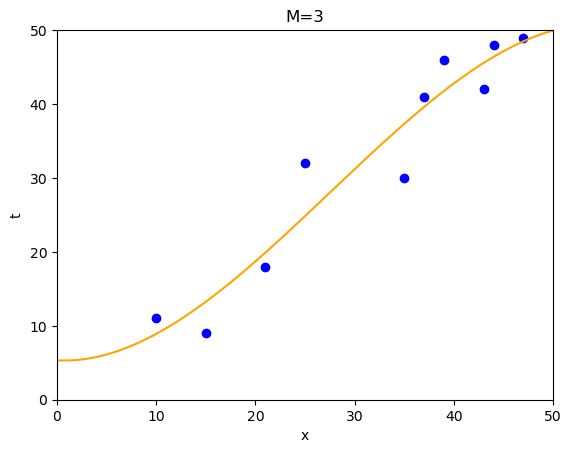

In [71]:
# 学習結果の多項式を描画
x = DataFrame(np.linspace(0, 50, 100), columns = ["x"])
t = model.predict(poly.fit_transform(x))
fig, subplot = plt.subplots()
subplot.set_title("M={}".format(m))
subplot.set_xlabel("x")
subplot.set_ylabel("t")
subplot.set_xlim(0, 50)
subplot.set_ylim(0, 50)
subplot.plot(x, t, color = "orange")
# 訓練データの散布図を描画
subplot.scatter(train_X, train_t, marker = "o", color = "blue")
plt.show()

In [72]:
def calc_rmse(model, poly, train_X, train_t, test_X, test_t):
    # 訓練データ（train_X）についてモデルを用いて予測（pred_train_t）
    pred_train_t = model.predict(poly.fit_transform(train_X))
    # 訓練データ（train_t）と予測結果（pred_train_t）の間の平方根平均二乗誤差を計算
    rmse_train = root_mean_squared_error(train_t, pred_train_t)
    # テストデータ（test_X）についてモデルを用いて予測（pred_test_t）
    pred_test_t = model.predict(poly.fit_transform(test_X))
    # テストデータ（test_t）と予測結果（pred_test_t）の間の平方根平均二乗誤差を計算
    rmse_test = root_mean_squared_error(test_t, pred_test_t)
    print("RMSE(Training) = ", rmse_train)
    print("RMSE(Test) =", rmse_test)
    return [rmse_train, rmse_test]

calc_rmse(model, poly, train_X, train_t, test_X, test_t)

RMSE(Training) =  4.07877554435053
RMSE(Test) = 8.191164031008602


[4.07877554435053, 8.191164031008602]

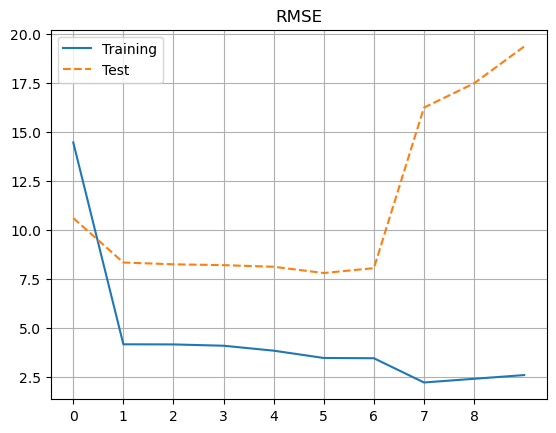

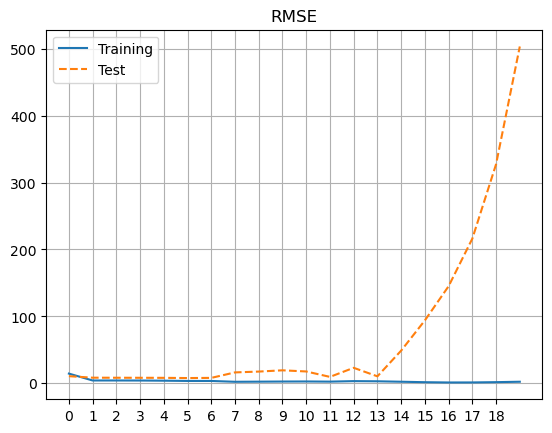

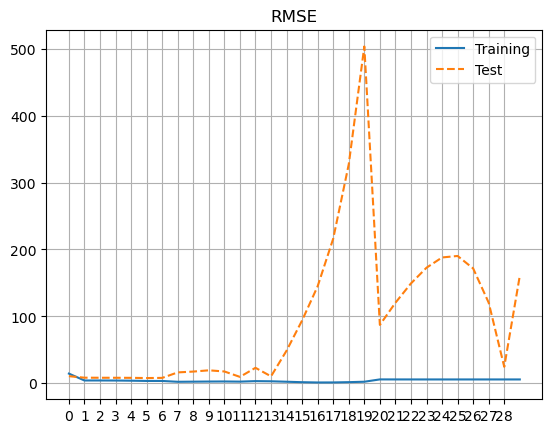

In [73]:
def plot_rmse_vs_degree(train_X=train_X, train_t=train_t, test_X=test_X, test_t=test_t, n=10):
    rmses = {"Training": [], "Test": []}
    for n in range(0, n): # 0からn-1まで繰り返し
        poly = PolynomialFeatures(degree = n)
        poly_X_train = poly.fit_transform(train_X)
        model = LinearRegression()
        model.fit(poly_X_train, train_t) # 訓練データによる学習
        pred_train_t = model.predict(poly.fit_transform(train_X)) # 訓練データについて予測
        pred_test_t = model.predict(poly.fit_transform(test_X)) # テストデータについて予測
        rmses["Training"].append(root_mean_squared_error(train_t, pred_train_t)) # 訓練データの平方根平均二乗誤差を計算
        rmses["Test"].append(root_mean_squared_error(test_t, pred_test_t)) # テストデータの平方根平均二乗誤差を計算
    rmse_data = DataFrame(rmses) # 0次元から9次元までの誤差をデータフレーム形式にする
    # データフレームの値を描画
    subplot = rmse_data.plot(grid=True, style=['-', '--'], xticks=range(0, n))
    subplot.set_title("RMSE")
    subplot.legend() # 凡例の出力
    plt.show()

plot_rmse_vs_degree()
plot_rmse_vs_degree(train_X, train_t, test_X, test_t, n=20)
plot_rmse_vs_degree(train_X, train_t, test_X, test_t, n=30)

---

### 考察
m=13を超えると、訓練データに対して過学習が起きていると考えられる。 <br>
m=[1, 6]の範囲であれば、訓練データとテストデータのRMSEが比較的小さく、過学習も起きていない。 <br>
よってこの範囲の次元数が適切であると考えられる。

M=1
RMSE(Training) = 4.152257706001916
RMSE(Test) = 8.324976194888992



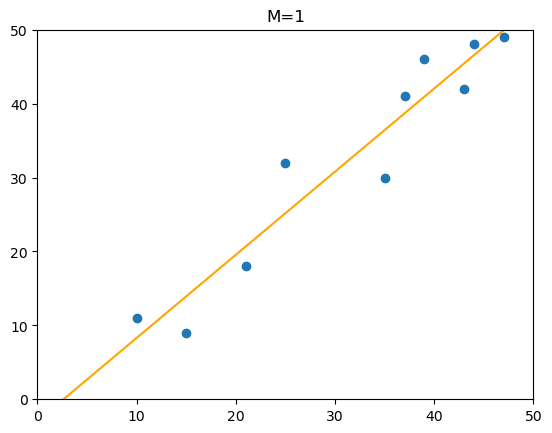

M=2
RMSE(Training) = 4.145478431840642
RMSE(Test) = 8.23407225716802



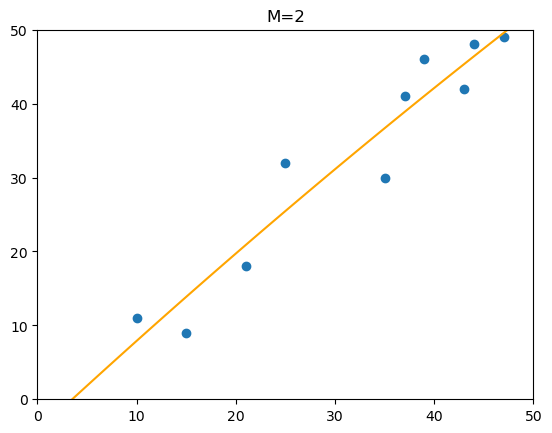

M=3
RMSE(Training) = 4.07877554435053
RMSE(Test) = 8.191164031008602



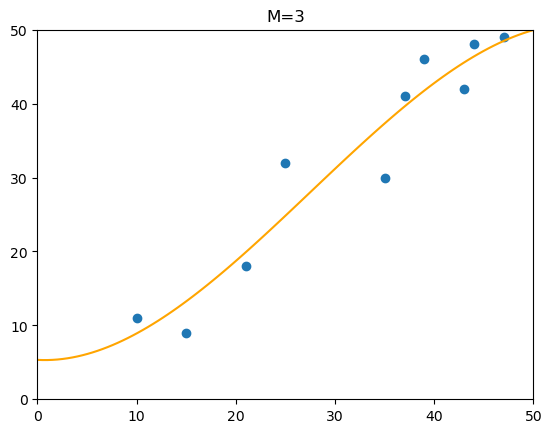

M=4
RMSE(Training) = 3.826879173286356
RMSE(Test) = 8.108717367109174



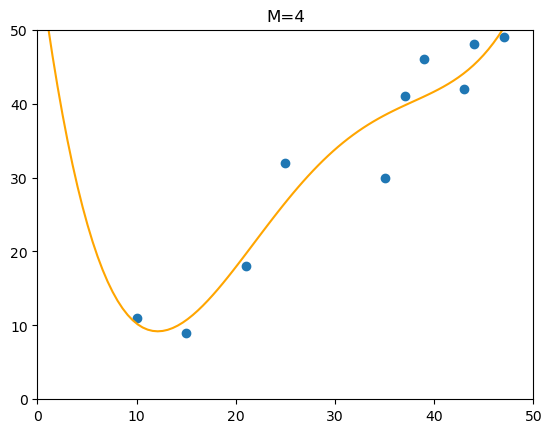

M=5
RMSE(Training) = 3.4536366264508405
RMSE(Test) = 7.789346010021269



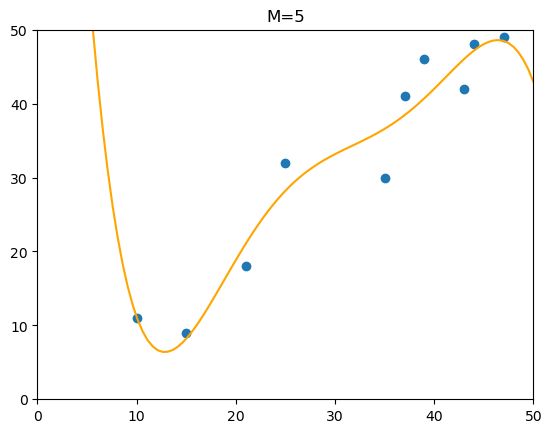

M=6
RMSE(Training) = 3.4409883742747525
RMSE(Test) = 8.037631404134101



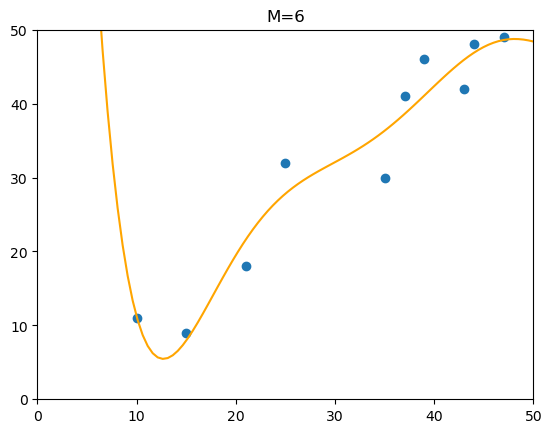

Summary:
[[4.15225771 8.32497619]
 [4.14547843 8.23407226]
 [4.07877554 8.19116403]
 [3.82687917 8.10871737]
 [3.45363663 7.78934601]
 [3.44098837 8.0376314 ]]


In [75]:
def plot_polynomial_regression(train_X, train_t, test_X, test_t, m):
    # PolynomialFeatures と LinearRegression からなるパイプラインを作る
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=m)),
        ("linear", LinearRegression())
    ])
    # パイプラインに訓練データを与えて学習
    model.fit(train_X, train_t)

    # RMSEの計算
    pred_train_t = model.predict(train_X)
    pred_test_t = model.predict(test_X)
    rmse_train = root_mean_squared_error(train_t, pred_train_t)
    rmse_test = root_mean_squared_error(test_t, pred_test_t)
    
    print(f"M={m}")
    print(f"RMSE(Training) = {rmse_train}")
    print(f"RMSE(Test) = {rmse_test}")
    print()

    # パイプラインにデータを与えて予測
    x = DataFrame(np.linspace(0, 50, 100), columns = ["x"])
    t = model.predict(x)
    
    # 結果の描画
    fig, subplot = plt.subplots()
    subplot.set_title("M={}".format(m))
    subplot.scatter(train_X, train_t)
    subplot.set_xlim(0, 50)
    subplot.set_ylim(0, 50)
    subplot.plot(x, t, color = "orange")
    plt.show()
    
    return [rmse_train, rmse_test]

result = []
for i in range(1, 7):
    rmse = plot_polynomial_regression(train_X, train_t, test_X, test_t, i)
    result.append(rmse)
    
print("Summary:")
print(np.array(result))

最小のXに対するRMSEは3.44098837 (m=6) <br>
最小のtに対するRMSEは7.78934601 (m=5) <br>
ではあるが、$x<10$に対する予測グラフを考えるとm=[1, 3]が適しているように感じる <br>
どちらを優先するかが問題ではあるが、ここではRMSE値を優先し、その誤差平均が最も小さいものを最適な次数として設定する。 <br>
またm=5or6の際に平均が小さくなることは自明であることから、この2つの平均を考える。

In [77]:
m_5 = (result[4][0] + result[4][1]) / 2
m_6 =(result[5][0] + result[5][1]) / 2

print(f"m=5: {m_5}, m=6: {m_6}")

m=5: 5.621491318236055, m=6: 5.739309889204427


以上より、m=6が最適な次元数であると考察する。